# Handling Missing Values

In [2]:
import pandas as pd
import numpy as np

In [3]:
nfl_data = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv", low_memory = False)
sf_permits = pd.read_csv("Building_Permits.csv", low_memory = False)

In [4]:
np.random.seed(0) # Allow for reproducibility

In [5]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [6]:
sf_permits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


In [7]:
#Get total number of missing cells for first 10 columns for nfl_data

missing_values_count  = nfl_data.isnull().sum()

missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

In [8]:
# Find the percentage of cells without a value for nfl_data

total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

27.652267428200588

In [9]:
# Find the percentage of cells without a value for sf_permits

missing_values_count = sf_permits.isnull().sum()

missing_values_count[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [10]:
# Find the percentage of cells without a value for sf_permits

total_missing = missing_values_count.sum()
total_cells = np.product(sf_permits.shape)

(total_missing/total_cells) * 100

26.26002315058403

In [11]:
# Following line removes all rows of data due to at least 1 missing value per row
# nfl_data.dropna()

In [12]:
nfl_data.bfill()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,1.0,15:00,15,3600.0,0.0,TEN,...,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,...,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,2017-01-01,2017010102,20,4,1.0,00:13,1,13.0,9.0,GB,...,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN,NaN,2016
362444,2017-01-01,2017010102,21,4,1.0,00:13,1,13.0,0.0,DET,...,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN,NaN,2016
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,...,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN,NaN,2016


In [13]:
# Find the percentage of cells without a value for nfl_data
# The number of total missing NaN cells went down drastically
total_missing = missing_values_count.sum()
total_cells = np.product(nfl_data.shape)

(total_missing/total_cells) * 100

6.075103232131789

# Scale and Normalize Data

In [181]:
import pandas as pd
import numpy as np

from scipy import stats

!pip install mlxtend --quiet
from mlxtend.preprocessing import minmax_scaling

import seaborn as sb
import matplotlib.pyplot as plt

kickstarters_2017 = pd.read_csv("ks-projects-201801.csv", encoding='UTF-8', low_memory=False)

np.random.seed(0)

In [4]:
kickstarters_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
kickstarters_2017.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.0,2010-12-08 08:44:04,0.0,failed,0,US,0.0,0.0,10526.0
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.0,2016-01-28 04:56:18,51.0,failed,5,US,51.0,51.0,10000.0
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.0,2014-11-07 02:24:36,25.0,failed,1,US,25.0,25.0,60000.0
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.0,2012-03-15 01:16:10,585.0,successful,17,US,585.0,585.0,500.0
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.0,2016-05-27 00:07:25,25.0,failed,1,US,25.0,25.0,25000.0


In [9]:
# Find the percentage of total missing values
missing_values_count = kickstarters_2017.isnull().sum()
total_missing_values = missing_values_count.sum()
total_cells = np.product(kickstarters_2017.shape)

percent_of_missing_values = (total_missing_values / total_cells) * 100
print(f'Total percentage of missing cells: {percent_of_missing_values:.2f}%')

Total percentage of missing cells: 0.07%


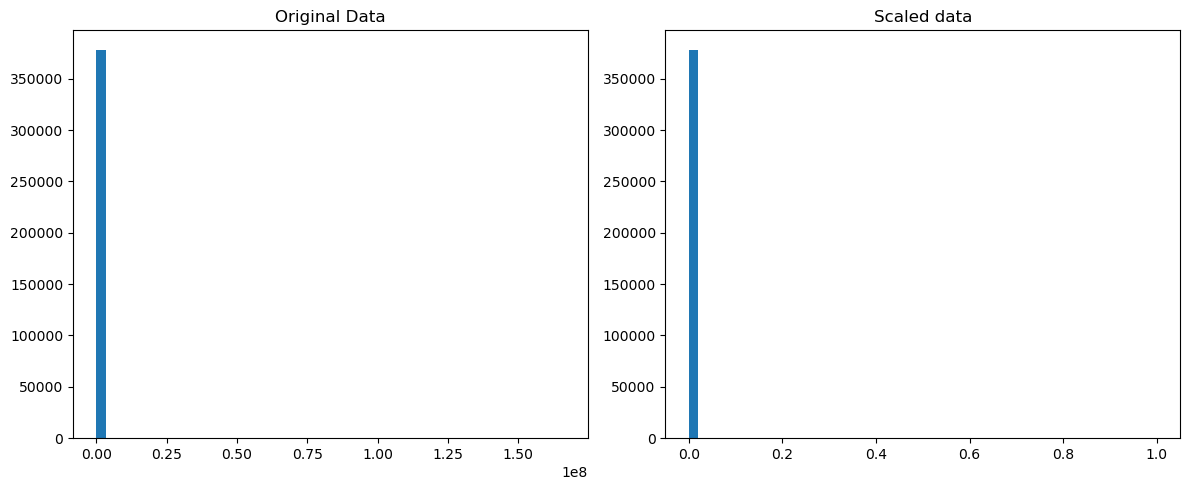

In [25]:
#Scale the goal feature then plot
usd_goal = kickstarters_2017.usd_goal_real
scaled_data = minmax_scaling(usd_goal.values, columns=[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(usd_goal, bins=50)
ax[0].set_title("Original Data")
ax[1].hist(scaled_data[:, 0], bins=50)
ax[1].set_title("Scaled data")
plt.tight_layout()
plt.show()


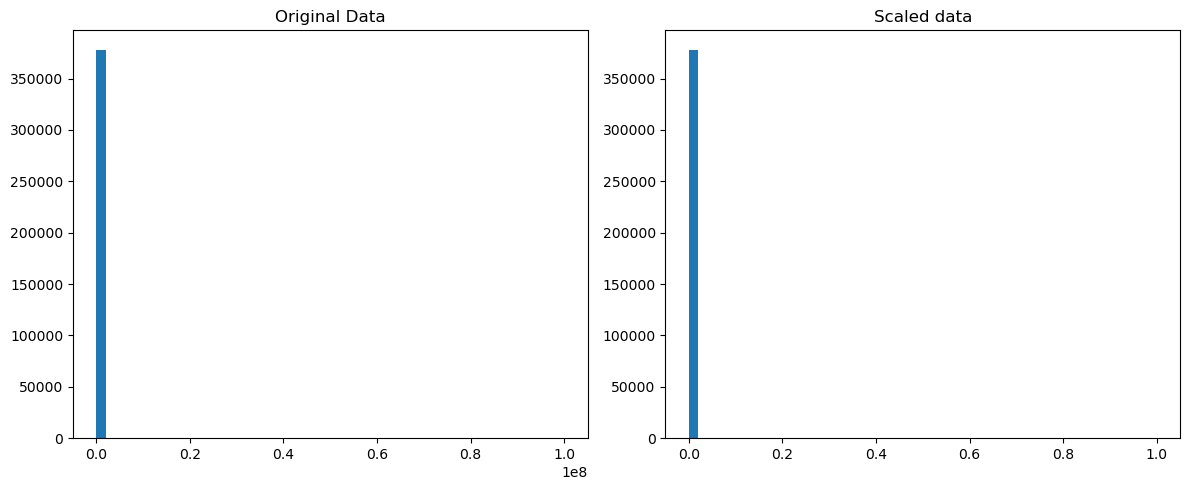

In [27]:
#Scale the goal feature then plot
goal = kickstarters_2017.goal
scaled_data = minmax_scaling(goal.values, columns=[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(goal, bins=50)
ax[0].set_title("Original Data")
ax[1].hist(scaled_data[:, 0], bins=50)
ax[1].set_title("Scaled data")
plt.tight_layout()
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_28312\392060993.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(positive_pledges, ax=ax[0])
C:\Users\angel\AppData\Local\Temp\ipykernel_28312\392060993.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(normalized_pledges, ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

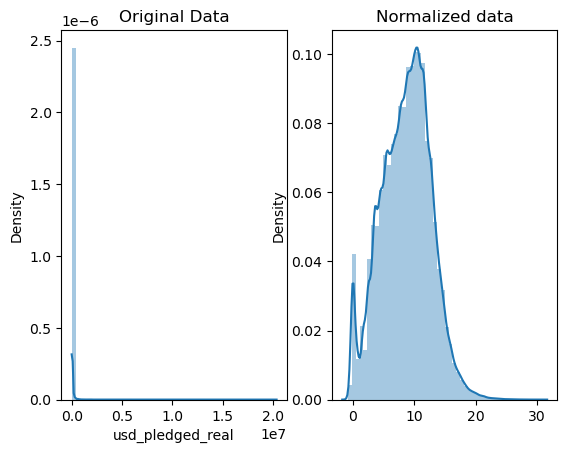

In [33]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sb.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sb.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

# Parsing Dates

In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime

In [60]:
# read in our data
earthquakes = pd.read_csv("input/earthquake-database/database.csv")
landslides = pd.read_csv("input/landslide-events/catalog.csv")
volcanos = pd.read_csv("input/volcanic-eruptions/database.csv")

np.random.seed(0)

In [68]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [72]:
landslides['date'].dtype

dtype('O')

In [132]:
earthquakes.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 00:00:00+00:00
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 00:00:00+00:00
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 00:00:00+00:00
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 00:00:00+00:00
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 00:00:00+00:00


In [76]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [88]:
earthquakes['Date'].dtype

dtype('O')

In [134]:
# earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%y")
# earthquakes['date_parsed'] = pd.to_datetime(earthquakes['date'], format = '%M/%D/%Y')
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format='mixed', utc = True)


In [136]:
earthquakes['date_parsed'].head()

0   1965-01-02 00:00:00+00:00
1   1965-01-04 00:00:00+00:00
2   1965-01-05 00:00:00+00:00
3   1965-01-08 00:00:00+00:00
4   1965-01-09 00:00:00+00:00
Name: date_parsed, dtype: datetime64[ns, UTC]

In [86]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


In [82]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = '%m/%d/%y')

In [84]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [138]:
day_of_month_landslides = landslides['date_parsed'].dt.day

In [140]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

In [142]:
day_of_month_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

<Axes: xlabel='date_parsed', ylabel='Count'>

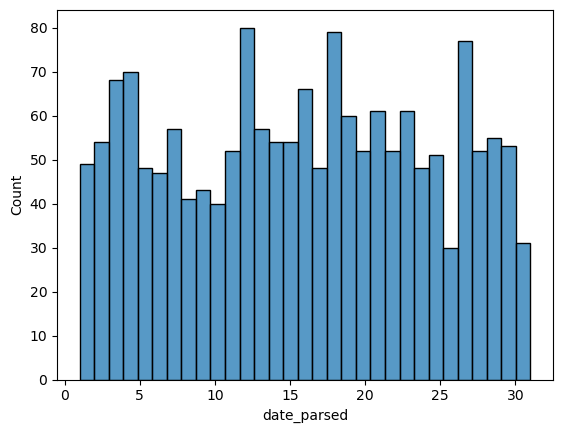

In [148]:
day_of_month_landslides = day_of_month_landslides.dropna()

sb.histplot(day_of_month_landslides, kde = False, bins=31)

<Axes: xlabel='date_parsed', ylabel='Count'>

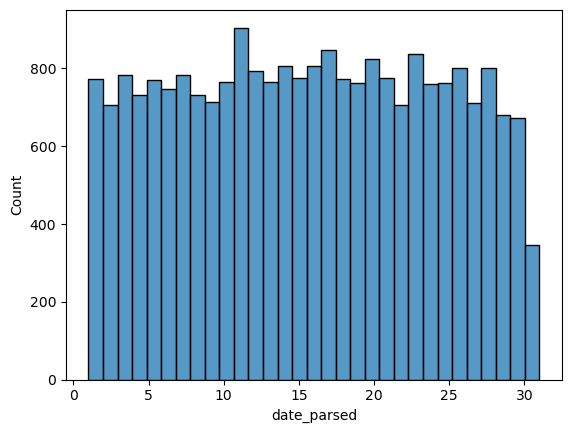

In [156]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

sb.histplot(day_of_month_earthquakes, kde=False, bins = 31)

# Character Encodings

In [159]:
import pandas as pd
import numpy as np

import chardet

np.random.seed(0)

In [161]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [163]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [165]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [167]:
print(after.decode("utf-8"))

This is the euro symbol: €


In [169]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

This is the euro symbol: ?


In [173]:
before = "This is the money symbol: $"


after = before.encode("ascii")

print(after.decode("ascii"))

This is the money symbol: $


In [179]:
before = "This is a symbol: 你好"

after = before.encode("ascii", errors = "replace")

print(after.decode("ascii"))

This is a symbol: ??


In [193]:
# save the kickstarters .csv file to utf-8 (python default)
kickstarters_2017.to_csv("ks-projects-201801-utf8.csv")

# Inconsistent Data Entry

In [200]:
import pandas as pd
import numpy as np

!pip install fuzzywuzzy[speedup] --quiet
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

np.random.seed(0)

In [204]:
with open("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [206]:
suicide_attacks = pd.read_csv('PakistanSuicideAttacks Ver 11 (30-November-2017).csv', encoding = 'Windows-1252')

In [208]:
suicide_attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Islamic Date             342 non-null    object 
 3   Blast Day Type           486 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     285 non-null    object 
 6   City                     496 non-null    object 
 7   Latitude                 493 non-null    float64
 8   Longitude                493 non-null    object 
 9   Province                 496 non-null    object 
 10  Location                 493 non-null    object 
 11  Location Category        461 non-null    object 
 12  Location Sensitivity     460 non-null    object 
 13  Open/Closed Space        461 non-null    object 
 14  Influencing Event/Event  1

In [212]:
suicide_attacks.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [220]:
# Check city column for any data entry inconsistencies
cities = suicide_attacks['City'].unique()

cities.sort()
cities

# Look for 'Lahore' vs. 'Lahore ' or 'Lakki Marwat' vs. 'Lakki marwat'

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [222]:
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()

In [238]:
province = suicide_attacks['Province'].unique()
province.sort()
province

# Look for 'FATA' vs 'Fata' or 'Balochistan' vs. 'Balochistan'

array(['AJK', 'Balochistan', 'Baluchistan', 'Capital', 'FATA', 'Fata',
       'KPK', 'Punjab', 'Sindh'], dtype=object)

In [240]:
# # convert to lower case
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
# remove trailing white spaces
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

In [246]:
cities = suicide_attacks["City"].unique()

cities.sort()
cities

# now look for 'd. i khan' vs. 'd.i khan'

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

In [248]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('d. i khan', 100),
 ('d.i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47),
 ('hangu', 46),
 ('kohat', 46),
 ('dara adam khel', 45),
 ('chaman', 43),
 ('mardan', 43)]

In [258]:
# Write function to replace rows that match the provided string 

def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get all unique values 
    strings = df[column].unique()
    # get the top 10 closes matches (like in above cell) which matches our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit = 10, scorer = fuzzywuzzy.fuzz.token_sort_ratio)
    # only store matches where ratio is >= 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    # get all rows get all rows with the close matches in our df
    rows_with_matches = df[column].isin(close_matches)
    # now replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    print("All done")

In [260]:
replace_matches_in_column(df=suicide_attacks, column='City', string_to_match="d.i khan")


All done


In [264]:
cities = suicide_attacks['City'].unique()

cities.sort()
cities

# now we search for d.i khan and we see that our function has removed the 'd. i khan' from our dataset

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kuram agency', 'kurram agency', 'lahore', 'lakki marwat',
       'lasbela', 'lower dir', 'malakand', 'mansehra', 'mardan',
       'mohmand agency', 'mosal kor, mohmand agency', 'multan',
       'muzaffarabad', 'north waziristan', 'nowshehra', 'orakzai agency',
       'peshawar', 'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)